In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
workdir_path = '/content/drive/My Drive/exercicio2 09112019' #MODIFICAR!!! #Caminho para o seu workspace
os.chdir(workdir_path)

In [46]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords

In [0]:
rev_frame=pd.read_csv('Reviews.csv')

In [49]:
df=rev_frame.copy()
df.head()

Id  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Text
0  1   ...  I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.                                                                                                                                                                                                                                                      
1  2   ...  Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".                                                                                                                                                                                                                                                                                                                               
2  3   ...  This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.
3  4   ...  If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The flavor is very medicinal.                                                                                                                                                                                                                                                                                                  
4  5   ...  Great taffy at a great price.  There was a wide assortment of yummy taffy.  Delivery was very quick.  If your a taffy lover, this is a deal.                                                                                                                                                                                                                                                                                                                                                                                 

[5 rows x 10 columns]

In [50]:
df.Text.value_counts()

This review will make me sound really stupid, but whatever. I don't really care as long as people find out what's real and can avoid my mistakes.<br /><br />I got my wonderful little sweet Bella Bean when she was a few days shy of three years old. She had been bounced around from house to house and eating whatever was cheap. I have had cats around me my entire life, for about twenty-five years now. My mother always just fed them whatever, the kinds of food you buy in the supermarket - Friskies, Nine Lives, Kit & Kaboodle, stuff like that. And our cats were always fine, at least in terms of their eating habits. They would eat in the morning, stop when they were done, come back, and eat some more when they got hungry.<br /><br />My housemate at the time was working for Hill's and assured me that this was the best food ever made, so great, so on and so forth. I now know that she is an utter buffoon, but I initially trusted her judgment, which is so unfortunate because she doesn't think. S

In [0]:
# Defina as opções de exibição para que as letras não sejam cortadas
pd.set_option('display.max_colwidth', -1)

In [0]:
df=df[df['HelpfulnessDenominator']>3][['Text','Score']]

In [0]:
df['review']=df['Text']
df['rating']=df['Score']
df.drop(['Text','Score'],axis=1,inplace=True)

In [54]:
# check for null values
print(df['rating'].isnull().sum())
df['review'].isnull().sum()  # no null values.

0


0

In [0]:
# remove duplicates/ for every duplicate we will keep only one row of that type. 
df.drop_duplicates(subset=['rating','review'],keep='first',inplace=True)

In [0]:
#remove 3 stars coments
df=df[df['rating']!=3]

In [57]:
# Defina 4/5 estrelas como positivas, o resto como negativo
#positivo igual pos
#negativo igual neg
df['sentiment'] = np.where(df['rating'] >= 4, 'pos', 'neg')

# Incluir apenas as colunas de opinião e comentários
df = df[['review', 'sentiment']]
df.head()

review sentiment
11  One of my boys needed to lose some weight and the other didn't.  I put this food on the floor for the chubby guy, and the protein-rich, no by-product food up higher where only my skinny boy can jump.  The higher food sits going stale.  They both really go for this food.  And my chubby boy has been losing about an ounce a week.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     pos     
14  The Strawberry Twizzlers are my guilty pleasure - yummy. Six pounds will be around for a while with my son and I.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            pos     
15  My daughter loves twizzlers and this shipment of six pounds really hit the spot. It's exactly what you would expect...six packages of strawberry twizzlers.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  pos     
32  McCann's Instant Oatmeal is great if you must have your oatmeal but can only scrape together two or three minutes to prepare it. There is no escaping the fact, however, that even the best instant oatmeal is nowhere near as good as even a store brand of oatmeal requiring stovetop preparation.  Still, the McCann's is as good as it gets for instant oatmeal. It's even better than the organic, all-natural brands I have tried.  All the varieties in the McCann's variety pack taste good.  It can be prepared in the microwave or by adding boiling water so it is convenient in the extreme when time is an issue.<br /><br />McCann's use of act

### 2. Separação dos dados

In [58]:
df.drop('sentiment', axis=1).values

array([["One of my boys needed to lose some weight and the other didn't.  I put this food on the floor for the chubby guy, and the protein-rich, no by-product food up higher where only my skinny boy can jump.  The higher food sits going stale.  They both really go for this food.  And my chubby boy has been losing about an ounce a week."],
       ['The Strawberry Twizzlers are my guilty pleasure - yummy. Six pounds will be around for a while with my son and I.'],
       ["My daughter loves twizzlers and this shipment of six pounds really hit the spot. It's exactly what you would expect...six packages of strawberry twizzlers."],
       ...,
       ["In the past, I would have to buy a large quantity of baker's ammonia which would dissipate with time.  I love the small quantity and it worked just fine in my special cookies."],
       ['Ammonium bicarbonate in a nice little package.  If you need ammonium bicarbonate in a stylish container, this is it.  Excellent buy.'],
       ['We need thi

In [59]:
df['sentiment'].values

array(['pos', 'pos', 'pos', ..., 'pos', 'pos', 'pos'], dtype=object)

In [0]:
from sklearn.model_selection import train_test_split

# Separação do label e das features
X = df.drop('sentiment', axis=1).values
y = df['sentiment'].values

# Separação de dados de treino e teste
train_features, test_features, class_train, class_test = train_test_split(X, y, test_size=0.20, random_state=10)

CountVectorizer

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

# Criação de matriz com a contagem de cada token SEM stop words
cv = CountVectorizer(max_features=10000)
cv_train_features = cv.fit_transform(train_features.ravel())
cv_test_features = cv.transform(test_features.ravel())

print('Shape das features de treino:', cv_train_features.shape, ' Shape das features de teste:', cv_test_features.shape)

# Criação de matriz com a contagem de cada token COM stop words
cv_sw = CountVectorizer(stopwords.words('portuguese'),max_features=10000)
cv_sw_train_features = cv_sw.fit_transform(train_features.ravel())
cv_sw_test_features = cv_sw.transform(test_features.ravel())

print('Shape das features de treino:', cv_sw_train_features.shape, ' Shape das features de teste:', cv_sw_test_features.shape)

Shape das features de treino: (46926, 10000)  Shape das features de teste: (11732, 10000)
Shape das features de treino: (46926, 10000)  Shape das features de teste: (11732, 10000)


 Funções Auxiliares

In [0]:
from sklearn import metrics

def train_predict_model(classifier, 
                        train_features, train_labels, 
                        test_features, test_labels):
    classifier.fit(train_features, train_labels)
    predictions = classifier.predict(test_features) 
    return predictions 

def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                  labels=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], 
                                                labels=level_labels)) 
    print(cm_frame) 

def display_classification_report(true_labels, predicted_labels, classes=[1,0]):

    report = metrics.classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels, 
                                           labels=classes) 
    print(report)

def display_model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, 
                                  classes=classes)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, 
                             classes=classes)
    
def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))


Random Forest com StopWords

In [63]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rfc = RandomForestClassifier(n_jobs=-1)

rfc_tfidf_predictions = train_predict_model(classifier=rfc, 
                                                train_features=cv_sw_train_features, train_labels=class_train,
                                                test_features=cv_sw_test_features, test_labels=class_test)

display_model_performance_metrics(true_labels=class_test, predicted_labels=rfc_tfidf_predictions,classes=['pos', 'neg'])

Model Performance metrics:
------------------------------
Accuracy: 0.8196
Precision: 0.8303
Recall: 0.8196
F1 Score: 0.8017

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         pos       0.81      0.97      0.88      8080
         neg       0.88      0.48      0.63      3652

    accuracy                           0.82     11732
   macro avg       0.84      0.73      0.75     11732
weighted avg       0.83      0.82      0.80     11732


Prediction Confusion Matrix:
------------------------------
            Predicted:      
                   pos   neg
Actual: pos  7845       235 
        neg  1881       1771


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead


Random Forest sem StopWords

In [64]:
rfc_tfidf_predictions = train_predict_model(classifier=rfc, 
                                                train_features=cv_train_features, train_labels=class_train,
                                                test_features=cv_test_features, test_labels=class_test)

display_model_performance_metrics(true_labels=class_test, predicted_labels=rfc_tfidf_predictions,classes=['pos', 'neg'])

Model Performance metrics:
------------------------------
Accuracy: 0.8252
Precision: 0.8367
Recall: 0.8252
F1 Score: 0.8082

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         pos       0.81      0.97      0.88      8080
         neg       0.89      0.50      0.64      3652

    accuracy                           0.83     11732
   macro avg       0.85      0.74      0.76     11732
weighted avg       0.84      0.83      0.81     11732


Prediction Confusion Matrix:
------------------------------
            Predicted:      
                   pos   neg
Actual: pos  7865       215 
        neg  1836       1816


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead


TF-IDF

In [65]:
!pip install liac-arff
import arff

In [66]:
type(train_features)

numpy.ndarray

In [67]:
np.asarray(train_features).ravel()

array(['If you are a trying to increase your consumption of tea in general, and green tea specifically to increase your antioxidants this is a good place to start.  In the past I have found green tea to be a little bland.  This tea has a little more flavor than most teas, and therefore is more like the standard black tea that most of us of accustomed to.<br /><br />I would also suggest the Earl Grey and Irish Breakfast green teas for the same reason, more flavor.  Try making a pitcher of tea with half green tea and half black tea.  My husband (a green tea hater) will even drink tea prepared in that half and half manner without complaint.<br /><br />I highly recommend this tea for those that are looking for a green tea with more flavor.',
       "There are several types of hams varying in quality.<br />Ham and water product is the lowest, followed by ham with water added, ham in natural juices and then the top of the line HAM.<br />North Country makes awesome hams. We've purchased them 

In [68]:
np.asarray(train_features)

array([['If you are a trying to increase your consumption of tea in general, and green tea specifically to increase your antioxidants this is a good place to start.  In the past I have found green tea to be a little bland.  This tea has a little more flavor than most teas, and therefore is more like the standard black tea that most of us of accustomed to.<br /><br />I would also suggest the Earl Grey and Irish Breakfast green teas for the same reason, more flavor.  Try making a pitcher of tea with half green tea and half black tea.  My husband (a green tea hater) will even drink tea prepared in that half and half manner without complaint.<br /><br />I highly recommend this tea for those that are looking for a green tea with more flavor.'],
       ["There are several types of hams varying in quality.<br />Ham and water product is the lowest, followed by ham with water added, ham in natural juices and then the top of the line HAM.<br />North Country makes awesome hams. We've purchased th

In [69]:
train_features

array([['If you are a trying to increase your consumption of tea in general, and green tea specifically to increase your antioxidants this is a good place to start.  In the past I have found green tea to be a little bland.  This tea has a little more flavor than most teas, and therefore is more like the standard black tea that most of us of accustomed to.<br /><br />I would also suggest the Earl Grey and Irish Breakfast green teas for the same reason, more flavor.  Try making a pitcher of tea with half green tea and half black tea.  My husband (a green tea hater) will even drink tea prepared in that half and half manner without complaint.<br /><br />I highly recommend this tea for those that are looking for a green tea with more flavor.'],
       ["There are several types of hams varying in quality.<br />Ham and water product is the lowest, followed by ham with water added, ham in natural juices and then the top of the line HAM.<br />North Country makes awesome hams. We've purchased th

In [70]:
from sklearn.feature_extraction.text import  TfidfVectorizer

tv = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
tv_train_features = tv.fit_transform(train_features.ravel())
tv_test_features = tv.transform(test_features.ravel())

print('Shape das features de treino:', tv_train_features.shape, ' Shape das features de teste:', tv_test_features.shape, '\n')

rfc_tfidf_predictions = train_predict_model(classifier=rfc, 
                                               train_features=tv_train_features, train_labels=class_train,
                                               test_features=tv_test_features, test_labels=class_test)
display_model_performance_metrics(true_labels=class_test, predicted_labels=rfc_tfidf_predictions,classes=['pos', 'neg'])

Shape das features de treino: (46926, 1032717)  Shape das features de teste: (11732, 1032717) 

Model Performance metrics:
------------------------------
Accuracy: 0.8062
Precision: 0.8326
Recall: 0.8062
F1 Score: 0.7788

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         pos       0.79      0.99      0.88      8080
         neg       0.94      0.41      0.57      3652

    accuracy                           0.81     11732
   macro avg       0.86      0.70      0.72     11732
weighted avg       0.83      0.81      0.78     11732


Prediction Confusion Matrix:
------------------------------
            Predicted:      
                   pos   neg
Actual: pos  7978       102 
        neg  2172       1480


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead


 STEMMER

In [71]:
nltk.download('rslp')
stemmer = nltk.stem.RSLPStemmer()

X = df.drop('sentiment', axis=1).values
y = df['sentiment'].values


corpus = []
for review in df['review']:
    phrase = []
    for word in review.split():
        w_stemmed = stemmer.stem(word)
        phrase.append(w_stemmed)
    corpus.append(phrase)
# Separate data into train and test
train_features, test_features, class_train, class_test = train_test_split(corpus, y, test_size=0.20, random_state=10)

rfc_stem_predictions = train_predict_model(classifier=rfc, 
                                               train_features=tv_train_features, train_labels=class_train,
                                               test_features=tv_test_features, test_labels=class_test)
display_model_performance_metrics(true_labels=class_test, predicted_labels=rfc_stem_predictions,classes=['pos', 'neg'])

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
Model Performance metrics:
------------------------------
Accuracy: 0.8068
Precision: 0.8331
Recall: 0.8068
F1 Score: 0.7796

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         pos       0.79      0.99      0.88      8080
         neg       0.94      0.41      0.57      3652

    accuracy                           0.81     11732
   macro avg       0.86      0.70      0.72     11732
weighted avg       0.83      0.81      0.78     11732


Prediction Confusion Matrix:
------------------------------
            Predicted:      
                   pos   neg
Actual: pos  7979       101 
        neg  2166       1486


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead


In [0]:
# Palavras negativas, removendo stopwords

neg_phrases = df[df['sentiment'] == 'neg']
neg_string = []
for phrase in neg_phrases['review']:
    for word in phrase.split():
        if word not in stopwords.words('english'):
            neg_string.append(word)

neg_text = pd.Series(neg_string).str.cat(sep=' ')

In [85]:
neg_text

'This oatmeal good. Its mushy, soft, I like it. Quaker Oats way go. Seriously product tasteless come. There much better tasting products 100 calories better special k bar cookie snack pack. You season combine something else share flavor. As canidae, Felidae also changed formula. Cats like change comes food. And change without putting label. We noticed color food changed smell. (As notice I also reviewd Canidae, happened time dogs issues.)<br /><br />Prior change food almost lost two cats moved new home. If cats get "upset" change enviorment, loud noise stop eating. It depends cat. Two stopped eating lost lot weight. We took vet took months get back normal. It year since better. Then formula food changed.<br /><br />We started noitce eating much started bug us. We asked shop owner feed store knowledge change food. It customers yelling dogs food making dogs sick. Right away changed cats food started chowing suffered one bit like dogs have.<br /><br />Cats sensitve animals changes thier f

In [0]:
# Palavras positivas, removendo stopwords

pos_phrases = df[df['sentiment'] == 'pos']
pos_string = []
for phrase in pos_phrases['review']:
    for word in phrase.split():
        if word not in stopwords.words('english'):
            pos_string.append(word)

pos_text = pd.Series(pos_string).str.cat(sep=' ')

WordCloud

In [72]:
!pip install wordcloud

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

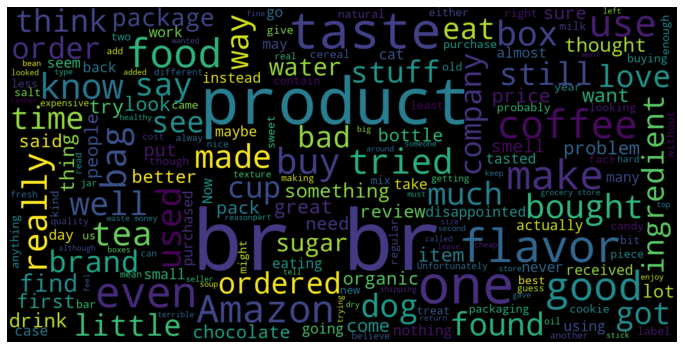

In [83]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neg_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

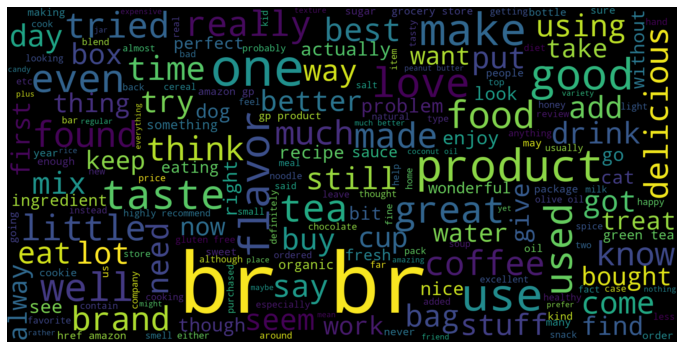

In [84]:

wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(pos_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()